# Peter Duggins
# SYDE 552/750
# Assignment: Spatiotemporal Receptive Fields and Models of Spiking
# March 31, 2016

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


## 1. Spatiotemporal Receptive Fields

### (200 words) Describe the spatiotemporal receptive fields of V1 simple cells

The spatiotemporal receptive field (STRF) is a generalization of the spike triggered average which describes the correlation between the stimulus at a particular time and location and the probability of generating a spike. For simple cells in area V1, the STRF can be described qualitatively and quantitatively. Qualitatively, V1 STRFs are similar to the kernels learning in early layers of convolutional neural networks: they have a small spatial extent relative to the whole visual field, and the manner in which the STRF weighs the spatial locations is well described by Gabor functions, which take the form

$D_s(x,y) = \frac{1}{1 \pi \sigma_x \sigma_y} exp(-\frac{x^2}{2\sigma^2_x}-\frac{-y^2}{2\sigma^2_y}) cos(kx-\phi)$

where $\sigma$ describes the spatial extent of the filter, $k$ is the preferred spatial frequency, and $\phi$ is the preferred spatial phase. The shape of the Gabor function is Gaussian-like in one dimension and cosine-like in the other, creating 1-5 nodes of positive and negative weight within the window defined by $\sigma_{x,y}$. The parameters $k$ and $\phi$ determine the number and location of these nodes. 

In the temporal domain, V1 STRF have a short lag period (latency) during which $D_t(\tau)$ increases in magnitude from zero. The function typically achieves its maximum $50-75$ms before the onset of the spike. At times preceeding this, $D_t(\tau)$ decreases, actually dropping below zero at the reveral point, typically about $100$ms before the spike. This negative value converges to zero as time extends backwards to infinity, capturing the idea that there is little to no correlation between the value of the stimulus and the onset of a spike for $\tau>300$ms. This shape is well-described by the biphasic function

$D_t(\tau)=\alpha exp(-\alpha \tau)(\frac{(\alpha \tau)^5}{5!}-\frac{(\alpha \tau)^7}{7!})$

Finally, the full STRF funciton may or may not be seperable in the spatial and temporal domain. In the cases I have been describing, it is possible to decompose the function into these two components, which results in a degree of symmetry of the STRF when its value is plotted against $\tau$ and $x$. However, in many real neurons, the STRF has complex temporal and spatial mixing, creating a multi-lobed funciton whose axis of symmetry, if it exists at all, does not lie on either the $\tau$ or $x$ axis. Though it is still possible to investigate how these cells respond to drifing gratings, modelling them is much more difficult, and relies on techniques such as summing multiple unique separable STRFs (a basis-function like approach).  


### (500 words) Read Nishimoto et al (2011) Reconstructing visual experiences from brian activity evoked by natural movies. Explain their methods in terms of spatiotemporal receptive fields.

Nishimoto et al use a motion-energy encoding model to overcome the limitation of slow fMRI signals, show that it describes how spatiotemporal information is re presented in voxels throughout the visual cortex, and use a Bayesian approach to produce reconstructions of natural movies from BOLD signals. To do so, they recorded BOLD signals from each voxel and fit each to a two-stage model. In the first stage, they filtered the voxel activation by a bank of neurally inspired nonlinear units sensitive to what they call "local motion-energy", a measure capable of capturing position and directional velocity. In the second stage, they git a separate hemodynamic response to the output of each nonlinear filter.

In their first experiment, they compared the performance of three encoding models which captured different local motion-energy features: a static model that contained no motion information; a nondirectional motion model that represented speed but not direction of perceived objects; and a fully directional position-velocity model. Each of these models was trained separately and tested on natural movies not present in the test set. The static model has significant prediction accuracy (0.24), showing that the BOLD responses (averaged across V1, V2, V3, V3a, and V3B) represents spatial information, as we expect given what we know about the STRFs of V1 neurons and the retinotopic organization of these areas. They confirmed this result by estimating the spatial, spatial frequency, and temporal frequency of the model fit to each voxel, finding spatial localization and retinotopic organization.

Both the directional and nondirectional models outperformed the static model (0.39, 0.40), showing that these areas encode a timing signal and providing evidence that these neurons have STRF, not just spatial receptive fields. Interestingly, the directional model only slightly outperformed the nondirectional model, indicating that the spatial and temporal components of the neurons STRFs may be separable (i.e. information about previous frames encodes absolut but not directed differences in position per unit time). They present preliminary evicence that more peripheral voxels were tuned for relatively higher speed, supporting the hypothesis that individual voxels have different STRFs depending on their eccentricity.

Generally speaking the ability of the two-stage model to identify the specific movie stimulus that evoked an observed BOLD signal (95% accuracy) demonstrates that fMRI data can be used to deduce spatiotemporal patterns presented to the visual system. In the discussion, they hypothesize that the systematic variation in STRF may be an adaptation to the nonuniform distribution of speed signals that is induced by selective foveation (attention and gaze direction to particular parts of the visual field) that occurs in natural scenes.

## 2. Spiking

### Plot the Nernst potential of Na+ channels vs external concentration $[Na^+]_{out}$ (1-200mM) with an internal concentration of $[Na^+]_{in}=10$mM

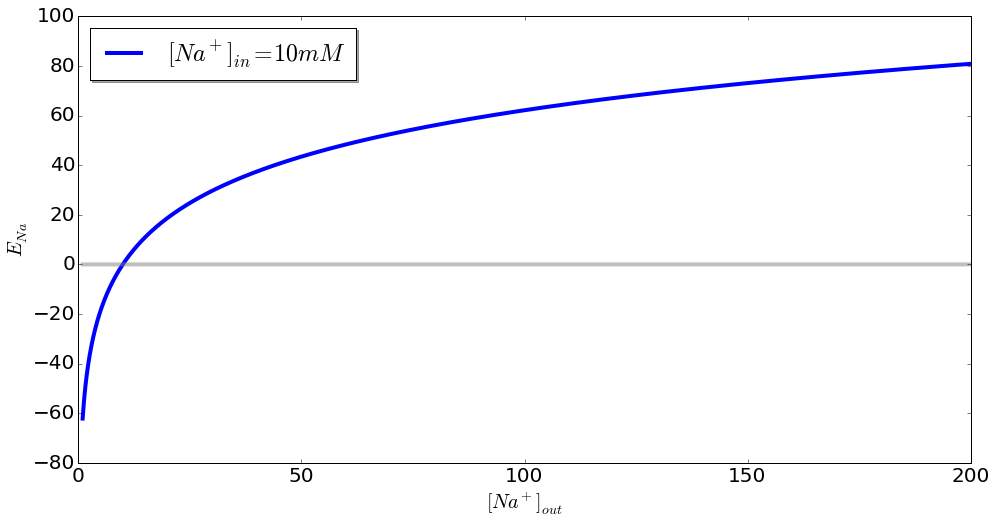

In [2]:
RT_over_F=27 #mV at room temperature
n=1 #sodium ions carry +1 charge
Na_out=np.arange(1,200,0.1) #mM
Na_in=10 #mM
E_Na=RT_over_F/n * np.log(Na_out/Na_in)

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
ax.plot(Na_out,E_Na,label='$[Na^+]_{in}=%s mM$' %Na_in)
ax.plot(Na_out,np.zeros((len(Na_out))),alpha=0.5,color='gray')
ax.set_xlabel('$[Na^+]_{out}$')
ax.set_ylabel('$E_{Na}$')
legend=ax.legend(loc='best',shadow=True)
plt.show()

### Simulate and adapting leaky-integrate-and-fire spiking model for $T=0.5$s with fixed $dt=0.0005$s. Plot the subthreshold membrane potential and adaptation conductance. 

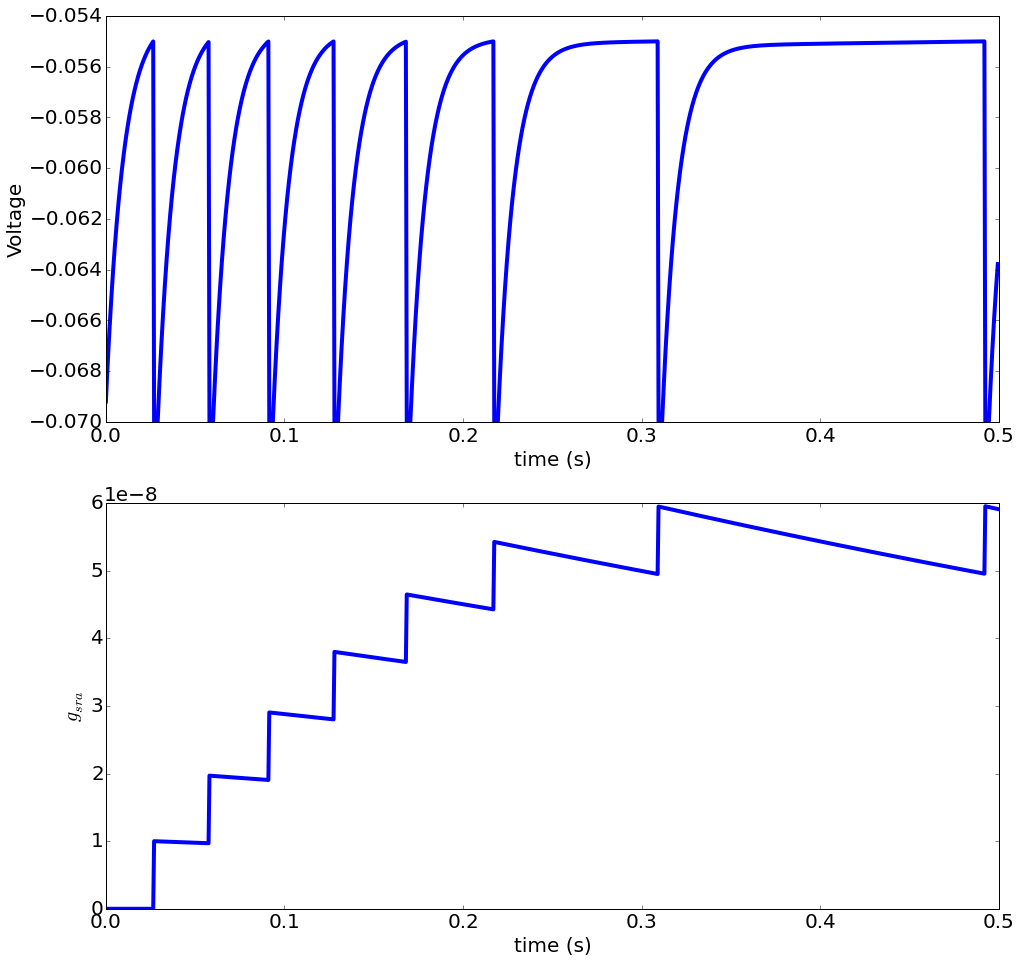

In [52]:
I_e=1.1e-9 #electrode current in A
c_m=10e-9 #spectific membrane capacitance in F/mm^2
r_m=1e6 #specific membrane resistance in ohms/mm^2
tau_m=c_m*r_m #membrane time constant
tau_ref=0.002 #post-spike refractory period in s
tau_sra=1.0 #0.1 #adaptation conductance time constant; INCREASED 10x from given
delta_g_sra=1e-8 #1e-9 #adaptation conductance spike increment in s; INCREASED 10x from given
E_leak=-0.065 #leak equilibrium potential in V
E_K=-0.075 #potassium equilibrium potential in V
A=0.1 #membrane area in mm^2
thresh=-0.055 #spike threshold potential
reset=-0.070 #post-spike reset potential
R_m=r_m/A #total membrane resistance
T=0.5 #simulation time in s
dt=0.0005 #simulation timestep
time=np.arange(0,T,dt)

V_list=[]
g_sra_list=[]
V=reset #begin at rest
g_sra=0 #no spike rate adaptation at rest
ref_window=int(tau_ref/dt) #number of timesteps to ignore dVdt after spike
ref_countdown=0

for t in time:
    if ref_countdown==0:
        dVdt = 1/tau_m * (E_leak - V - r_m*g_sra*(V - E_K) + R_m*I_e)
    else:
        ref_countdown += -1
        dVdt=0
    V+=dt*dVdt #euler's method approximation
    
    if V >= thresh:
        V=reset
        ref_countdown=ref_window
        g_sra += delta_g_sra 
        
    dg_sra_dt = -g_sra/tau_sra
    g_sra += dt*dg_sra_dt #euler's method approximation
    
    V_list.append(V)
    g_sra_list.append(g_sra)
    
fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(211)
ax.plot(time,V_list)
ax.set_xlabel('time (s)')
ax.set_ylabel('Voltage')
ax=fig.add_subplot(212)
ax.plot(time,g_sra_list)
ax.set_xlabel('time (s)')
ax.set_ylabel('$g_{sra}$')
plt.show()

Note that I had to increase $\Delta g_{sra}$ from $1*10^{-9}$ to $6*10^{-8}$ to observe adaptation. This value corresponds to that used in Figure 5.6C in Dayan and Abbot, so it seems like a reasonable change.

### Simulate a regular-spiking Izhikevich neuron for $T=0.5$ seconds using $dt=0.0002$ and parameters from Izhikevich (2003) IEEE Trans Neural Networks. Use $I=0$ for $0<t<0.1$ and $I=10$mV for $t>0.1$. Plot $u$ vs. $v$, along with the $u$ and $v$ nullclines. Make another such plot for fast-spiking neurons. 

The $U$ and $V$ nullclines are found by setting the derivatives to zero:

$I=0$:

 - $dV/dt=0=0.04V^2 + 5V + 140 - U$

 - $dU/dt=0=a(bV-U)$

Nullclines

 - $U=0.04V^2 + 5V + 140$
 
 - $V=U/b$
 
$I=10$:

 - $dV/dt=0=0.04V^2 + 5V + 150 - U$

 - $dU/dt=0=a(bV-U)$

Create nullclines

 - $U=0.04V^2 + 5V + 150$
 
 - $V=U/b$

In [61]:
def izhikevich_spiking(a,b,c,d,T,dt):

    I=lambda t: 10*(t>100)
    time=np.arange(0,T,dt)
    V=0
    U=0

    V_list=[]
    U_list=[]

    for t in time:

        dVdt = 0.04*V**2 + 5*V + 140 - U + I(t)
        dUdt = a*(b*V - U)

        V+=dt*dVdt #euler's method approximation
        U+=dt*dUdt

        if V >= 30:
            V=c
            U+=d

        V_list.append(V)
        U_list.append(U)

    V_list=np.array(V_list)    
    U_list=np.array(U_list)    

    #nullclines
    V_span=np.arange(np.min(V_list), -40) #, np.max(V_list))
    U_span=np.arange(-80, 30)  #, np.max(U_list))
    V_null_I_0 = 0.04*np.square(V_span) + 5*V_span + 140
    V_null_I_10 = 0.04*np.square(V_span) + 5*V_span + 150
    U_null = U_span*b

    #plot U vs V
    fig=plt.figure(figsize=(16,16))
    ax=fig.add_subplot(111)
    ax.scatter(V_list,U_list)
    ax.set_xlabel('Potential (mV)')
    ax.set_ylabel('Recovery')
    ax.plot(U_span,U_null,label='U nullcline')
    ax.plot(V_span,V_null_I_0,label='V nullcline, I=0')  #plot I=0 nullcline
    ax.plot(V_span,V_null_I_10,label='V nullcline, I=10')  #plot I=10 nullcline
    legend=ax.legend(loc='best',shadow=True)
    ax.set_xlim(-90,40)
    plt.show()

### Regular Spiking

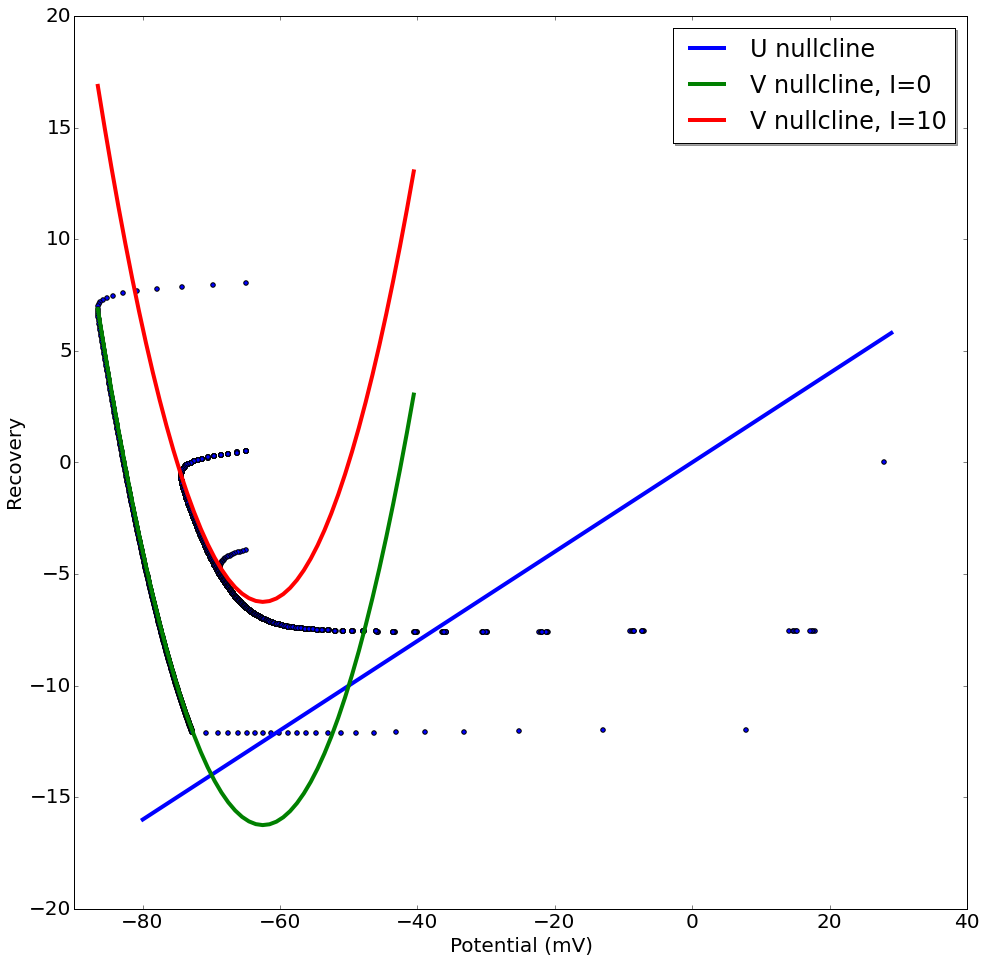

In [62]:
a=0.02 #timescale of recovery variable
b=0.2 #sensitivity of recovery variable to subthreshold fluctuations
c=-65 #after-spike voltage reset in mV
d=8 #after-spike recovery variable reset
T=500 #simulation time in ms
dt=0.2 #simulation timestep in ms

izhikevich_spiking(a,b,c,d,T,dt)

### Fast Spiking

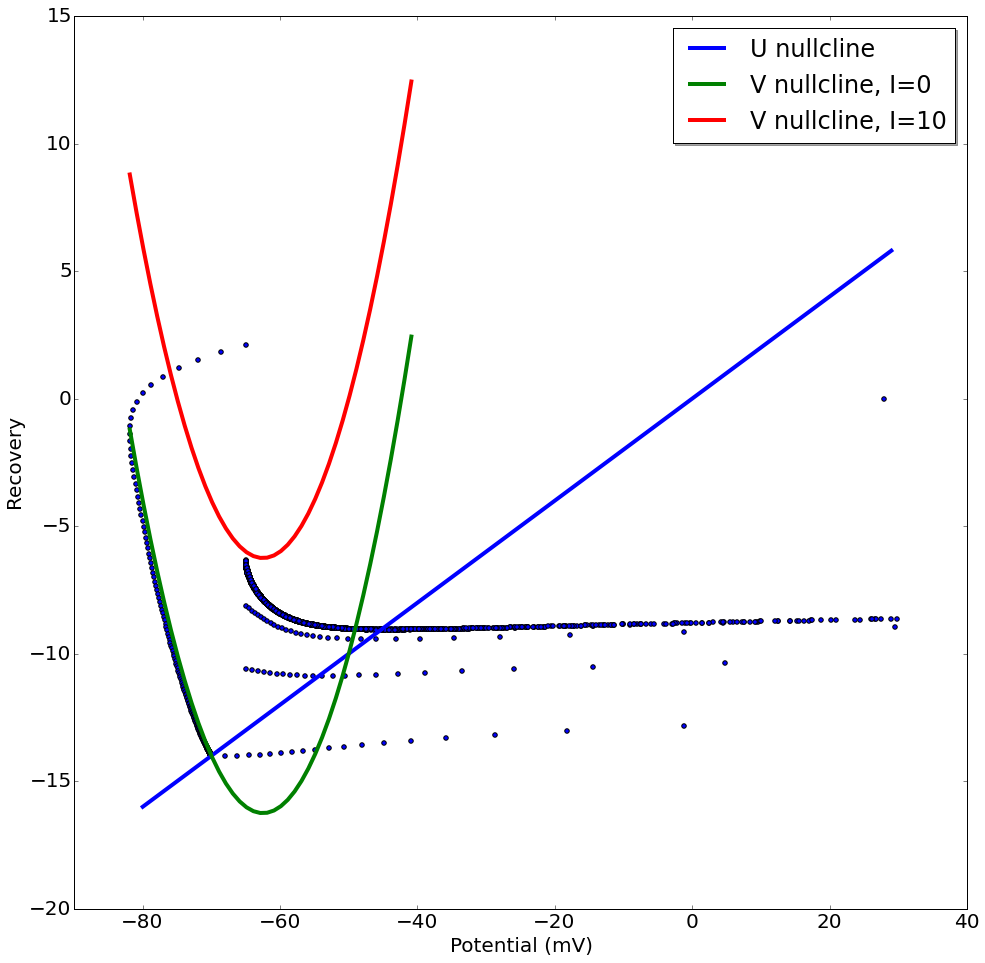

In [63]:
a=0.1 #timescale of recovery variable
b=0.2 #sensitivity of recovery variable to subthreshold fluctuations
c=-65 #after-spike voltage reset in mV
d=2 #after-spike recovery variable reset
T=500 #simulation time in ms
dt=0.2 #simulation timestep in ms

izhikevich_spiking(a,b,c,d,T,dt)